In [1]:
from helper import*
import params as cfg

In [2]:
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [3]:
M11_EEG = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M11_1 = M11_EEG[0,:,:]
M11_2 = M11_EEG[1,:,:]
M11_3 = M11_EEG[2,:,:]
M11_4 = M11_EEG[3,:,:]
M11_5 = M11_EEG[4,:,:]
time_s = np.arange(0,len(M11_1)* 1/cfg.fs,1/cfg.fs)
#plots(time_s,M11_1,cfg.channels,['blue','orange','green','red'],[700,1000])

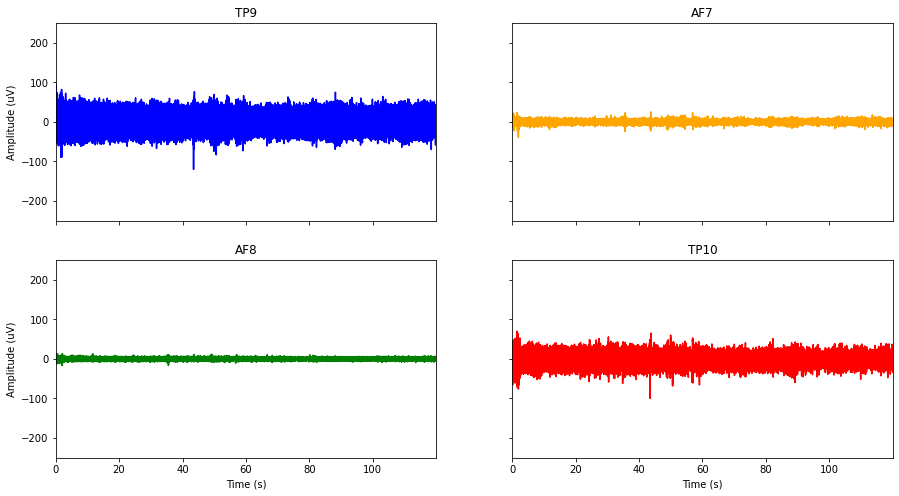

In [7]:
icaM11_1 = ica(M11_1,cfg.fs)
icaM11_2 = ica(M11_2,cfg.fs)
icaM11_3 = ica(M11_3,cfg.fs)
icaM11_4 = ica(M11_4,cfg.fs)
icaM11_5 = ica(M11_5,cfg.fs)
plots(time_s,icaM11_1,cfg.channels,['blue','orange','green','red'],[-250,250])

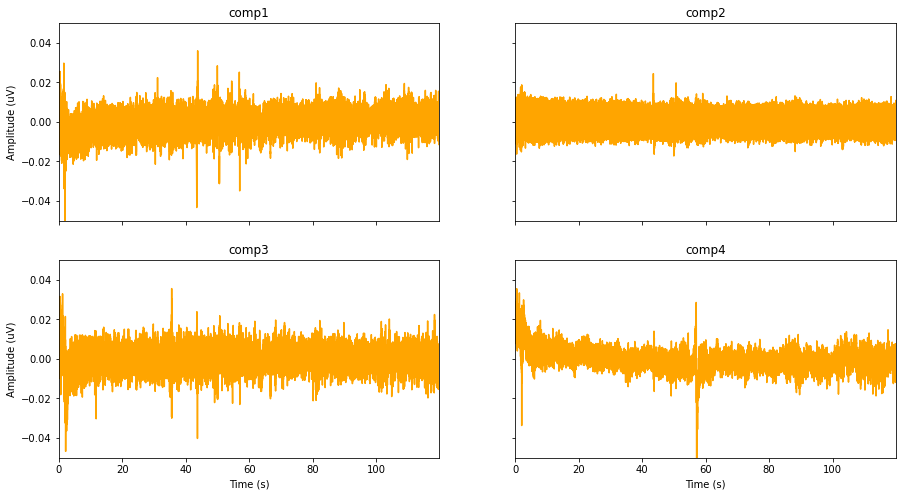

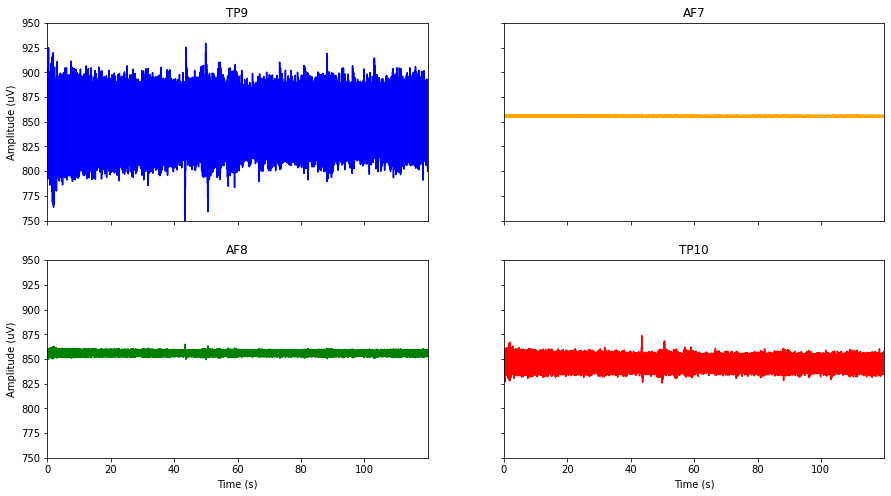

In [8]:
ica = FastICA(len(M11_1.T),max_iter=500,tol=0.5,random_state=0)
comps_M11_1 = ica.fit_transform(M11_1)
plots(time_s,comps_M11_1,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
comps_M11_1[:,[0,2,3]] = 0 

recov_M11_1 = ica.inverse_transform(comps_M11_1)
plots(time_s,recov_M11_1 ,cfg.channels,['blue','orange','green','red'],[750,950])

In [ ]:
ica = FastICA(len(M11_1.T),max_iter=500,tol=0.5,random_state=0)
comps_M11_1 = ica.fit_transform(M11_1)
comps_M11_2 = ica.fit_transform(M11_2)
comps_M11_3 = ica.fit_transform(M11_3)
comps_M11_4 = ica.fit_transform(M11_4)
comps_M11_5 = ica.fit_transform(M11_5)
plots(time_s,comps_M11_1,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
plots(time_s,comps_M11_2,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
plots(time_s,comps_M11_3,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
plots(time_s,comps_M11_4,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
plots(time_s,comps_M11_5,['comp1','comp2','comp3','comp4'],['orange','orange','orange','orange'],[-0.05,0.05])
comps_M11_1[:,[0,2,3]] = 0 
comps_M11_2[:,[0,1,2,3]] = 0
comps_M11_3[:,[0,1,2,3]] = 0
comps_M11_4[:,[0,1,2,3]] = 0
comps_M11_5[:,[0,1,2,3]] = 0

recov_M11_1 = ica.inverse_transform(comps_M11_1)
recov_M11_2 = ica.inverse_transform(comps_M11_2)
recov_M11_3 = ica.inverse_transform(comps_M11_3)
recov_M11_4 = ica.inverse_transform(comps_M11_4)
recov_M11_5 = ica.inverse_transform(comps_M11_5)
plots(time_s,recov_M11_1 ,cfg.channels,['blue','orange','green','red'],[750,950])
plots(time_s,recov_M11_2 ,cfg.channels,['blue','orange','green','red'],[825,875])
plots(time_s,recov_M11_3 ,cfg.channels,['blue','orange','green','red'],[825,875])
plots(time_s,recov_M11_4 ,cfg.channels,['blue','orange','green','red'],[825,875])
plots(time_s,recov_M11_5 ,cfg.channels,['blue','orange','green','red'],[850,860])

In [ ]:
plt.plot(recov_M11_5[:,0])